In [67]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import *

In [7]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''

"\ngreys = ['#767676', '#b3b3b3', '#212121']\nsns.set_palette(sns.color_palette(greys))\n"

# Data preprocessing

In [8]:
df_raw = pd.read_csv('final_data.csv')
df_raw.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek


In [75]:
def data_generation(df, features, sample_size):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    df_temp = df_temp.sample(frac = sample_size, random_state = 0)
    y = df_temp['popularity']
    X = df_temp.drop('popularity', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return([X_train, X_test, y_train, y_test])

In [79]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

X_train, X_test, y_train, y_test = data_generation(df, features, .2)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
56655,0.97200,0.502,264280,0.343,0.000003,5,0.1010,-14.392,1,0.1560,133.057,2,0.556
36466,0.02360,0.884,232959,0.559,0.000000,7,0.1010,-7.442,1,0.1200,97.994,0,0.342
696,0.01790,0.618,269000,0.938,0.000000,9,0.1670,-3.442,1,0.0456,91.455,0,0.875
23221,0.03970,0.646,323133,0.699,0.000031,9,0.1540,-8.122,0,0.0669,91.440,0,0.530
46979,0.69400,0.526,526387,0.328,0.000000,6,0.1120,-9.864,1,0.0461,116.068,0,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31539,0.77700,0.485,172200,0.204,0.000000,7,0.1190,-14.328,1,0.0340,144.046,2,0.485
29180,0.10500,0.628,247507,0.555,0.000000,11,0.0707,-8.718,1,0.0287,106.104,0,0.607
9547,0.60500,0.583,263397,0.515,0.000691,2,0.0931,-9.283,0,0.0571,115.732,0,0.603
6771,0.00579,0.507,272440,0.914,0.000112,3,0.4010,-4.836,0,0.0841,75.091,0,0.300


# Data exploration 

### Which features are popular now 

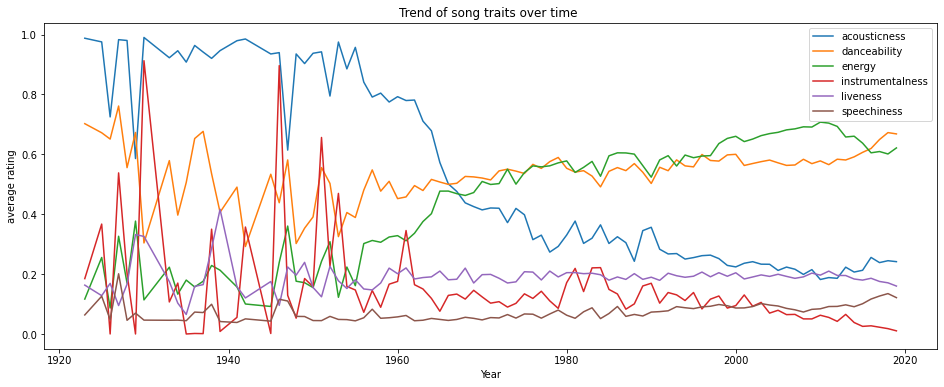

In [5]:
song_traits = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness']

#--------------------------------------------------------------------------------------------------
plt.figure(figsize=(16,6))
for trait in song_traits:
    fig = sns.lineplot(data = df_raw, x='year', y=str(trait),
                       ci=None, label=str(trait), estimator='mean')


fig.title.set_text('Trend of song traits over time ')
fig.set(xlabel='Year', ylabel='average rating')

plt.show()

# Data cleaning

- Should probably drop artist name 
- Should probably drop track name 
- Should probably drop track_id


In [55]:
df = df_raw.copy()

# Changing categorical variable mode
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0

# Changing categorical variable keys
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i

# Changing categorical variable time signature
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i

# Changing popularity into binary variable 
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]
    

df = df.drop('Unnamed: 0', axis=1)
    
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek


# Comparing model performance 

In [81]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
temp = []
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('K Neigbor Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))



for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    temp.append([name, cv_results.mean(), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'score', 'cv_reults_std'])
mdl_performance = mdl_performance.sort_values('cv_results', ascending=False)
mdl_performance

KeyboardInterrupt: 

# Logistic regression

In [ ]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------

mdl = LogisticRegression()
mdl.fit(X_train, y_train)








# Random Forest

In [86]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
mdl = RandomForestClassifier(n_estimators=400,
                            min_samples_leaf=.12,
                            random_state=1)

mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
print(f'test MSE: {mse_test}')

accuracy = accuracy_score(y_test, y_pred)
print(f'test accuracy: {accuracy}')



test MSE: 0.36297786720321934
test accuracy: 0.6370221327967807
